In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")

In [13]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [14]:
df.shape

(1436, 11)

In [15]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [26]:
dieselcolumn = pd.get_dummies(df['Fuel_Type'],dtype='int') #changing the categorical column to numerical with the help of getdummies in pandas 

In [25]:
dieselcolumn

,CNG,Diesel,Petrol
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,0,0,1
1432,0,0,1
1433,0,0,1
1434,0,0,1


In [44]:
df_new = df.join(other=dieselcolumn,how='left') #join the two dataframes using left join 

In [36]:
df_new

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,CNG,Diesel,Petrol
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025,0,0,1
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015,0,0,1
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015,0,0,1
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015,0,0,1


In [45]:
df_new.drop("Fuel_Type",axis=1,inplace=True) #drop the "Fuel_type" column as we have dummies of that column

In [46]:
data = df_new #changing the df_new to data 

In [47]:
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,CNG,Diesel,Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


In [42]:
data.shape

(1436, 13)

In [43]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
CNG          0
Diesel       0
Petrol       0
dtype: int64

In [95]:
corre=data[['Price','HP']].corr() #checking the correlation between the price and HP(horsepower) column
corre

,Price,HP
Price,1.00000,0.31499
HP,0.31499,1.00000


<AxesSubplot:>

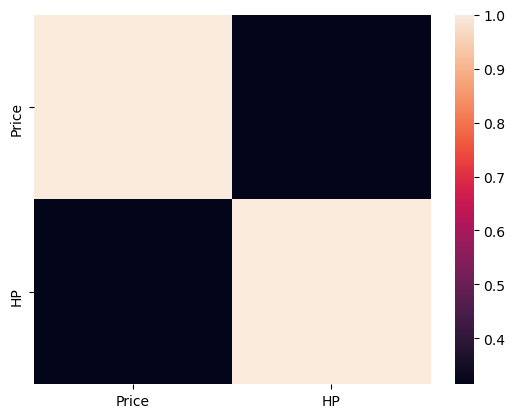

In [96]:
sns.heatmap(corre)

In [48]:
#now i am splitting the target and features columns
#as we know that we have to find the toyota car price with the given attributes "price" is my target column and remaining are my feature columns

In [52]:
target = data[["Price"]]
features = data.drop("Price",axis = 1)

In [55]:
#splitting the data with train_test_split and adding linear model library 

In [58]:
from sklearn.linear_model import LinearRegression #linearregression model
from sklearn.model_selection import train_test_split #train_test_split model to split the data

In [68]:
x_train,x_test,y_train,y_test = train_test_split(features,target,train_size=0.8,random_state=100) 
#we are splitting the 80% for training and 20% for testing with randomstate = 100

In [69]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 12)
(288, 12)
(1148, 1)
(288, 1)


In [70]:
linreg = LinearRegression() #attaching model to the linreg

In [71]:
linreg.fit(x_train,y_train)

LinearRegression()

In [98]:
linreg.coef_   #coeffients of the model

array([[-1.21202374e+02, -1.79798518e-02,  2.32883578e+01,
         2.97300679e+02, -5.46848558e-02, -3.24405760e+01,
         3.69482223e-13,  6.27705393e+02,  2.27745531e+01,
        -8.46354108e+02,  1.20010203e+01,  8.34353088e+02]])

In [74]:
#test the model with r2score
from sklearn.metrics import r2_score

In [75]:
ypred = linreg.predict(x_test)

In [79]:
r2_score(ypred,y_test) #we got 83% of accuracy score which is not bad but we still build the same with l1 and l2 and check

0.8328836768243392

we have achieved a 83% of accuracy with the model while the training the data with 80% 

### Building the linear regression model with stats models

In [80]:
#import the stats model 
import statsmodels.formula.api as sfa

In [82]:
data.head(3)

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,CNG,Diesel,Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0


In [87]:
model=sfa.ols(formula='Price~Age_08_04+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight+CNG+Diesel+Petrol',data=data).fit()
model

In [88]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     912.3
Date:                Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                        22:01:50   Log-Likelihood:                -12369.
No. Observations:                1436   AIC:                         2.476e+04
Df Residuals:                    1425   BIC:                         2.482e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -536.2488     87.966     -6.096      0.000    -708.806    -363.691
Age_08_04   -123.7771      2.631    -47.043      0.000    -128.938    -118.616
KM            -0.0175      0.001    -13.154      0.000      -0.020      -0.015
HP            23.5270      3.575      6.581      0.000      16.515      30.539
Automatic    300.2592    161.026      1.865      0.062     -15.614     616.133
cc            -0.0556      0.092     -0.604      0.546      -0.236       0.125
Doors        -30.3567     40.908     -0.742      0.458    -110.603      49.890
Cylinders  -2144.9951    351.866     -6.096      0.000   -2835.225   -1454.765
Gears        622.7990    198.026      3.145      0.002     234.346    1011.252
Weight        20.8174      1.218     17.090      0.000      18.428      23.207
CNG         -744.7999    228.075     -3.266      0.001   -1192.198    -297.401
Diesel      -190.7456    191.966     -0.994      0.321    -567.311     185.820
Petrol       399.2967    138.672      2.879      0.004     127.274     671.320
==============================================================================
Omnibus:                      265.277   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2773.279
Skew:                          -0.532   Prob(JB):                         0.00
Kurtosis:                       9.724   Cond. No.                     4.91e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.64e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

here in this stats we got 86% of r2 value which is accuracy and got many coeffients with the summary funtion

## L1 Regulaization (Lasso)

In [89]:
from sklearn.linear_model import Lasso

In [99]:
lasso = Lasso(alpha=1)

In [100]:
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [104]:
lasso.score(x_test,y_test) #the score for testing data is 84%

0.8452889317790161

In [105]:
lasso.score(x_train,y_train) #the score for training data is 86%

0.868368430455569

In [112]:
##to find the best alpha value we go for gridsearch model

In [106]:
from sklearn.model_selection import GridSearchCV #import grid search model

In [107]:
params = {'alpha':[1,2,3,4,5,7,8,9,20,10,15,30]}

In [109]:
grid_search = GridSearchCV(lasso,params)
grid_search

GridSearchCV(estimator=Lasso(alpha=1),
             param_grid={'alpha': [1, 2, 3, 4, 5, 7, 8, 9, 20, 10, 15, 30]})

Here the gridsearch is also giving the alpha value of "1"

### the Lasso(L1 regulazition ) gave the accuracy of 84% with the alpha value 1

## L2 Regularaization (Ridge)

In [111]:
#import the ridge model
from sklearn.linear_model import Ridge

In [113]:
ridge = Ridge(alpha=1)

In [114]:
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [126]:
ridge.score(x_test,y_test)

0.8451488052694082

In [127]:
#to find the best alpha value we go gridsearch

In [128]:
grid_search = GridSearchCV(ridge,params)
grid_search

GridSearchCV(estimator=Ridge(alpha=1),
             param_grid={'alpha': [1, 2, 3, 4, 5, 7, 8, 9, 20, 10, 15, 30]})

here after the gridsearch the model gave alpha value 1 
In alpha 1 the Ridge model gave the 84% accuracy